In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from model import BangladeshModel


"""
    Run simulation
    Print output at terminal
"""

# ---------------------------------------------------------------
def run_simulation_batch(seed, run_length, probs):
    model = BangladeshModel(seed=seed, scenario_probabilities=probs)
    for i in range(run_length):
        model.step()
    bridges_data = [{"unique_id": bridge.unique_id,
                     "name": bridge.name,
                     "delay_time": bridge.delay_time,
                     "breaks_down": bridge.breaks_down} for bridge in model.bridges]
    return pd.DataFrame(bridges_data)

def run_simulation_for_scenario(seeds, run_length, probs):
    batch_results = {}
    for seed in seeds:
        df_bridge = run_simulation_batch(seed, run_length, probs)
        batch_results[seed] = df_bridge
    return batch_results

def run_all_scenarios(seeds, run_length, scenarios):
    all_scenario_results = {}
    for scenario_index, probs in enumerate(scenarios, start=1):
        print(f"Running scenario {scenario_index} with probabilities {probs}")
        scenario_results = run_simulation_for_scenario(seeds, run_length, probs)
        all_scenario_results[f"Scenario_{scenario_index}"] = scenario_results
    return all_scenario_results

# Define your scenarios
scenarios = [
    {'A': 0, 'B': 0, 'C': 0, 'D': 0},  # Scenario 0
    {'A': 0, 'B': 0, 'C': 0, 'D': 5},  # Scenario 1
    {'A': 0, 'B': 0, 'C': 0, 'D': 10},  # Scenario 2
    {'A': 0, 'B': 0, 'C': 5, 'D': 10},  # Scenario 3
    {'A': 0, 'B': 0, 'C': 10, 'D': 20},  # Scenario 4
    {'A': 0, 'B': 5, 'C': 10, 'D': 20},  # Scenario 5
    {'A': 0, 'B': 10, 'C': 20, 'D': 40},  # Scenario 6
    {'A': 5, 'B': 10, 'C': 20, 'D': 40},  # Scenario 7
    {'A': 10, 'B': 20, 'C': 40, 'D': 80},  # Scenario 8
    # Add more scenarios as needed
]

# Set your seeds and run length
seeds = range(1, 50)  # 10 seeds for each scenario
# run_length = 5 * 24 * 60  # Example run length
run_length = 1
# Run all scenarios
all_scenario_results = run_all_scenarios(seeds, run_length, scenarios)

Running scenario 1 with probabilities {'A': 0, 'B': 0, 'C': 0, 'D': 0}
Source1 GENERATE VehicleTruck10825 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10826 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10827 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10828 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10829 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10830 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10831 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10832 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10833 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10834 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10835 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10836 +0 -None State.DRIVE(0) Source1(1) 0
Source1 GENERATE VehicleTruck10837 +0 -None State.DRIVE(0) Source

In [37]:
all_results = all_scenario_results['Scenario_1'][1].copy()
all_results = all_results[['unique_id', 'name']]

for scenario in all_scenario_results:
    for iteration in all_scenario_results[scenario]:
        for index, row in all_scenario_results[scenario][iteration].iterrows():
            all_results.loc[index, f'delay_time_{scenario}_{iteration}'] = row.delay_time
            all_results.loc[index, f'breaks_down_{scenario}_{iteration}'] = row.breaks_down

delay_time_columns = all_results.filter(regex='^delay_time_').columns

all_results['total_delay_time'] = all_results[delay_time_columns].sum(axis=1)

# Select columns that start with 'breaks_down_'
breaks_down_columns = all_results.filter(regex='^breaks_down_').columns

# Count how often True appears in the breaks_down columns for each row
all_results['total_breakdowns'] = all_results[breaks_down_columns].apply(lambda x: x.value_counts().get(True, 0),
                                                                         axis=1)

all_results[['unique_id', 'name', 'total_delay_time', 'total_breakdowns']]  # Show the result for the new columns

C:\Users\julia\AppData\Local\Temp\ipykernel_9520\2460272006.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  all_results.loc[index, f'breaks_down_{scenario}_{iteration}'] = row.breaks_down
C:\Users\julia\AppData\Local\Temp\ipykernel_9520\2460272006.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  all_results.loc[index, f'breaks_down_{scenario}_{iteration}'] = row.breaks_down
C:\Users\julia\AppData\Local\Temp\ipykernel_9520\2460272006.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype fir

,unique_id,name,total_delay_time,total_breakdowns
0,3,. 3,268.547762,8
1,5,. 5,73.073206,5
2,7,KANCHPUR PC GIRDER BRIDGE 7,2686.773598,22
3,9,NOYAPARA CULVERT 9,345.721697,25
4,11,NAYABARI KASPUR BOX CULVERT 11,80.579556,6
...,...,...,...,...
186,375,T. B HOSPITAL GATE BOX CULVERT 375,150.429806,9
187,377,GAMMON BRIDGE 377,399.523450,10
188,379,PAKKA MATA BOX CULVERT 379,120.895083,7
189,381,GLAXO BOX CULVERT 381,53.873668,4


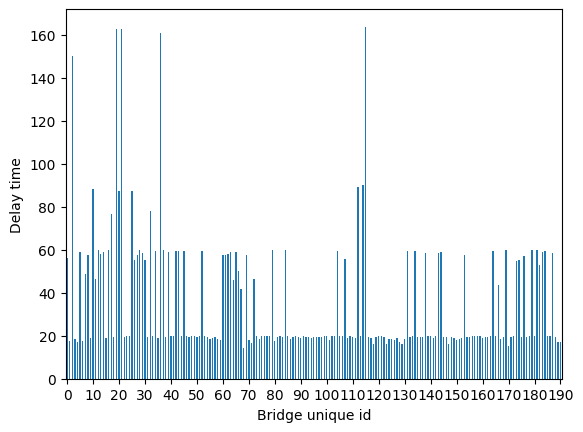

In [38]:
for i in all_scenario_results:
    for j in all_scenario_results[i]:
        all_scenario_results[i][j].set_index('unique_id')
        all_scenario_results[i][j]['delay_time'].plot(kind='bar')
        
plt.xticks(ticks = range(0,200, 10), rotation=0)
plt.xlabel('Bridge unique id')
plt.ylabel('Delay time')
plt.show()

In [39]:
delay_data = []

for i in all_scenario_results:
    for j in all_scenario_results[i]:
        delay = all_scenario_results[i][j]['delay_time'].sum()
        delay_data.append({
        'scenario': i,
        'seed': j,
        'delay_time': delay
    })

delay_data = pd.DataFrame(delay_data, columns=['scenario', 'seed', 'delay_time'])
delay_data

,scenario,seed,delay_time
0,Scenario_1,1,0.000000
1,Scenario_1,2,0.000000
2,Scenario_1,3,0.000000
3,Scenario_1,4,0.000000
4,Scenario_1,5,0.000000
...,...,...,...
436,Scenario_9,45,961.545842
437,Scenario_9,46,935.681640
438,Scenario_9,47,636.528540
439,Scenario_9,48,1104.563831


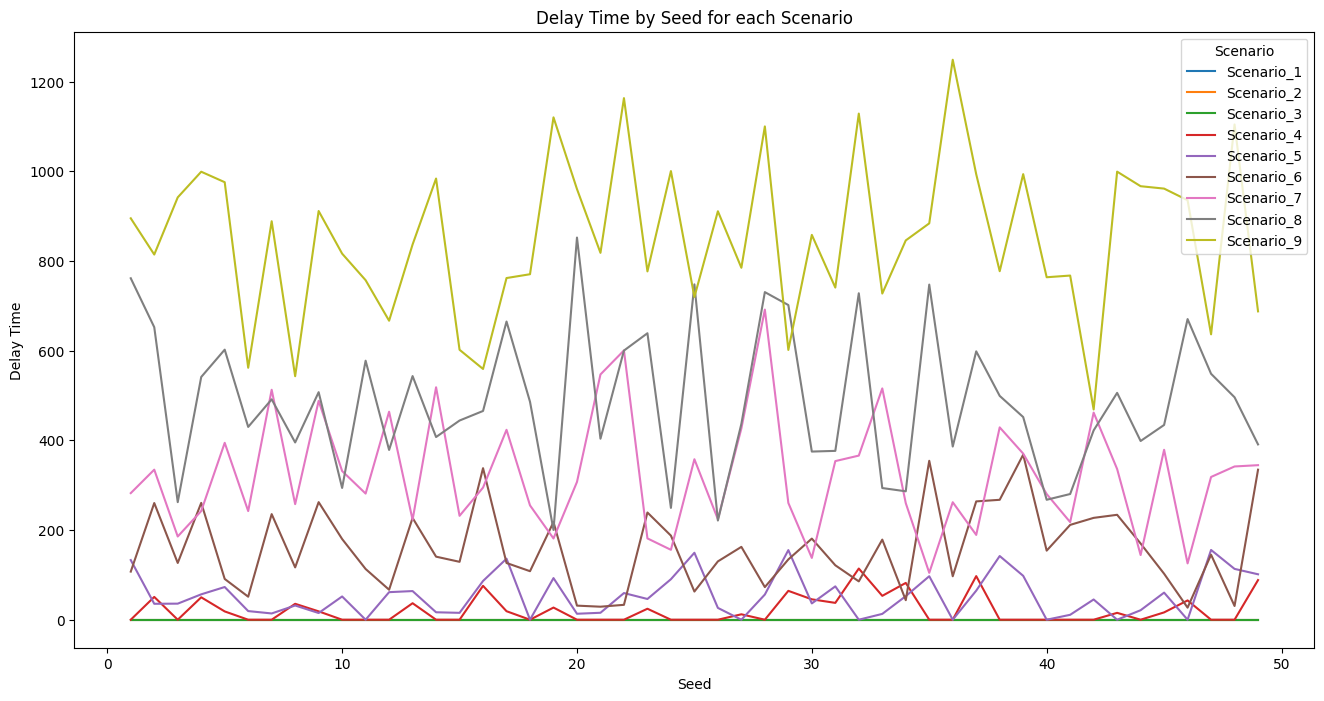

In [40]:
# Pivot the DataFrame so that each scenario has its own column for delay_time
pivot_df = delay_data.pivot(index='seed', columns='scenario', values='delay_time')

# Plotting
plt.figure(figsize=(16,8))

# Plot a line for each scenario
for scenario in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[scenario], label=scenario)

# Labeling the axes
plt.xlabel('Seed')
plt.ylabel('Delay Time')
plt.title('Delay Time by Seed for each Scenario')

# Add a legend to the plot
plt.legend(title='Scenario')

# Show the plot
plt.show()